# installs and imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import os
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader


# load data

In [ ]:
# Define the folder where the .mat files are saved
folder_path = '/kaggle/input/all-matrices-new' # Replace with your actual folder path
# List all .mat files in the folder
mat_files = [f for f in os.listdir(folder_path) if f.endswith('.mat')]
print(f'Num of .mat files in folder: {len(mat_files)}')

Num of .mat files in folder: 539


In [3]:


def load_and_process_mat_files(new_matrices_folder):
    """
    Load and process .mat files from the specified folder. Extract 's_obj' and 'f_doppler'
    matrices, and construct a dictionary mapping test file names to values extracted from the filenames.
    
    Args:
    - new_matrices_folder (str): Path to the folder containing .mat files.

    Returns:
    - s_obj_list_new (list of DataFrame): List of DataFrames containing 's_obj' matrices.
    - file_name_new (list of str): List of file names corresponding to each 's_obj' matrix.
    - file_dict (dict): Dictionary mapping 'TestN' to the value after the underscore in the file name.
    """

    # List all .mat files in the folder
    new_mat_files = [f for f in os.listdir(new_matrices_folder) if f.endswith('.mat')]

    # Extract the numeric part from the filenames and sort them based on the test number (after 'test')
    def extract_test_number(filename):
        match = re.search(r'test(\d+)', filename, re.IGNORECASE)
        return int(match.group(1)) if match else 0

    # Sort the files based on the test number
    new_mat_files.sort(key=extract_test_number)

    s_obj_list_new = []
    file_name_new = []
    file_dict = {}
    
    # Loop through each .mat file and load the matrix
    for mat_file in new_mat_files:
        # Skip if the filename contains 'combined' or 'c' or 'i5'
        if 'combined' in mat_file.lower() or '_c' in mat_file.lower() or '_i5' in mat_file.lower():
            print(f"Skipping file {mat_file} (contains 'combined' or 'c' or 'i5')")
            continue
        
        # Construct the full path to the .mat file
        mat_path = os.path.join(new_matrices_folder, mat_file)

        # Load the .mat file
        mat_data = scipy.io.loadmat(mat_path)

        # Access the 's_obj' and 'f_doppler' variables from the loaded data
        s_obj = mat_data.get('s_obj')
        f_doppler = mat_data.get('f_doppler')

        if s_obj is not None:
            # Extract the test number (after 'test')
            test_number = extract_test_number(mat_file)

            # Extract the value after the underscore (could be a number or a letter)
            value_match = re.search(r'_(\w+)\.', mat_file)
            value = value_match.group(1) if value_match else 0

            # Build the file name and store the matrix
            file_name_new.append(f'Test{test_number}')
            s_obj_df = pd.DataFrame(s_obj)
            s_obj_list_new.append(s_obj_df)

            # Add entry to file_dict where key is 'TestN' and value is the part after '_'
            file_dict[f'Test{test_number}'] = value
        else:
            print(f"'s_obj' not found in {mat_file}")

        if f_doppler is not None:
            f_doppler_df = pd.DataFrame(f_doppler)
        else:
            print(f"'f_doppler' not found in {mat_file}")

    # Return the created lists and dictionary
    return s_obj_list_new,f_doppler_df, file_name_new, file_dict





In [4]:
new_matrices_folder = '/kaggle/input/all-matrices-new'  # Replace with your actual folder path
s_obj_list_new,f_doppler_df, file_name, file_dict = load_and_process_mat_files(new_matrices_folder)

# Print the created file_dict
print("Created file_dict:")
print(file_dict)

Skipping file Test0_c.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file Test5_cfail.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file Test7_c.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file Test15_c.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file Test16_c.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file Test17_c.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file Test18_c.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file Test23_c.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file test73_combined.bin.mat (contains 'combined' or 'c' or 'i5')
Skipping file test117_i5.mat (contains 'combined' or 'c' or 'i5')
Skipping file test118_i5.mat (contains 'combined' or 'c' or 'i5')
Skipping file test119_i5.mat (contains 'combined' or 'c' or 'i5')
Skipping file test120_i5.mat (contains 'combined' or 'c' or 'i5')
Skipping file test1021_i5.bin.mat (contains 'combined' or 'c' or 'i5')
Created file_dict:
{'Test1': 'i0', 'Test2': '

In [5]:
#physio data

physio_matrices_folder = '/kaggle/input/all-matrices-new/physio_data'  # Replace with your actual folder path
s_obj_list_physio,f_doppler_df_physio, file_name_physio, file_dict_physio = load_and_process_mat_files(physio_matrices_folder)

# Print the created file_dict
print("Created file_dict for physiotherapist data:")
print(file_dict_physio)

Skipping file test1_i5.mat (contains 'combined' or 'c' or 'i5')
Skipping file test5_ci.mat (contains 'combined' or 'c' or 'i5')
Skipping file test6_ci.mat (contains 'combined' or 'c' or 'i5')
Skipping file test7_ci.mat (contains 'combined' or 'c' or 'i5')
Skipping file test8_ci.mat (contains 'combined' or 'c' or 'i5')
Skipping file test12_ci6.mat (contains 'combined' or 'c' or 'i5')
Skipping file test15_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test16_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test17_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test21_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test22_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test23_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test24_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test25_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test26_c.mat (contains 'combined' or 'c' or 'i5')
Skipping file test27_c.mat (contains '

In [6]:
print(file_name[5])


Test8


In [7]:
len(s_obj_list_new)

525

In [8]:
def fix_test_numbers(file_dict):
    """
    This function checks for gaps in the test numbers of the given dictionary and renames subsequent tests
    to maintain consecutive numbering.

    Args:
        file_dict (dict): A dictionary where the keys are of the form 'TestN' and values are associated labels.

    Returns:
        dict: A new dictionary with consecutive test numbers without gaps.
    """
    # Convert the keys into sorted test numbers
    keys = list(file_dict.keys())
    keys.sort(key=lambda x: int(re.search(r'\d+', x).group()))

    # Create a new dictionary to store consecutive keys
    fixed_file_dict = {}

    # Start from Test1 and ensure there are no gaps
    expected_number = 1

    for key in keys:
        # Extract the current test number from the key
        current_number = int(re.search(r'\d+', key).group())

        # If there is a gap, adjust the key number
        if current_number != expected_number:
            new_key = f'Test{expected_number}'
        else:
            new_key = key

        # Add the adjusted key-value pair to the new dictionary
        fixed_file_dict[new_key] = file_dict[key]

        # Increment the expected number
        expected_number += 1
        
    updated_file_dict = {
      key: (int(value.lstrip('i')) if 'i' in value else 5 if value == 'f' else 'phys' if value == 'phys' else int(value))
      for key, value in fixed_file_dict.items()
      }

    
    file_name = list(updated_file_dict.keys())
    file_values = list(updated_file_dict.values())

    return file_name,file_values,updated_file_dict


# # Update the dictionary: remove 'i', convert values to int, and replace 'f' with 5
# def update_file_dict(file_dict):
  
#   return updated_file_dict

In [9]:
# correct the keys and values of the dictionary to use as labels
file_name, file_values,correct_file_dict = fix_test_numbers(file_dict)
print(file_name[5])
print(file_values[5])

Test6
3


In [10]:
file_name_physio, file_values_physio,correct_file_dict_physio = fix_test_numbers(file_dict_physio)
print(file_name_physio)
print(file_values_physio[5])

['Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10']
4


In [11]:
print('number of matrices:',len(s_obj_list_new))
print('each matrix has dims:',s_obj_list_new[0].shape)
print('each doppler has dims:',f_doppler_df.shape)

number of matrices: 525
each matrix has dims: (1024, 1247)
each doppler has dims: (1024, 1)


In [12]:
print('number of matrices for physio data:',len(s_obj_list_physio))
print('each matrix has dims:',s_obj_list_physio[0].shape)
print('each doppler has dims:',f_doppler_df_physio.shape)

number of matrices for physio data: 10
each matrix has dims: (1024, 1247)
each doppler has dims: (1024, 1)


In [13]:
s_obj_list_new[0].head(5)

,0,1,2,3,4,5,6,7,8,9,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246
0,2947.582513,4495.424633,2235.308905,5658.627391,5503.964480,3119.152327,1720.308867,4475.712044,3274.178984,2505.974824,...,3928.747303,2483.463881,2734.316675,2754.331767,2542.342931,2175.279248,5761.698441,3409.407779,2436.837808,5098.089230
1,2839.401857,5066.460655,3992.420181,8276.674077,6482.123057,3794.944780,2632.040676,4742.998853,2870.755094,3240.365685,...,5206.954480,3222.553376,1684.186478,2229.347198,3189.968425,3179.984642,5138.162143,3808.793239,2878.337510,5432.316163
2,5096.024500,5884.020082,5733.104416,9879.745197,6741.263926,5371.030867,3680.803217,5504.834966,2696.393102,3816.015627,...,5885.614711,3806.092040,2561.345610,2105.621172,3489.750143,3801.636576,3948.673927,5020.826497,4079.534447,5077.112623
3,7287.554472,6729.698537,7155.250289,10178.580674,6339.891779,6723.660810,4373.406933,6320.007960,3225.747528,3925.356348,...,5804.884055,3969.877755,3781.534772,2517.628702,3275.605682,3841.603401,2803.688463,6003.556730,5041.359603,4152.864413
4,8575.945800,7260.989675,7927.958661,9109.368641,5514.591823,7445.634356,4534.380704,6809.457830,3733.910046,3522.221371,...,4978.064674,3595.872941,4433.674173,2972.376951,2673.771611,3312.759535,3694.966096,6359.363200,5403.066940,3037.118863


In [14]:
f_doppler_df.head()

,0
0,-1996.09375
1,-1992.18750
2,-1988.28125
3,-1984.37500
4,-1980.46875


# preprocess data

In [15]:
def truncate_n_columns(dataset,no_of_columns = 47):
    # Truncate signal to remove first data points - to account for late start etc
    truncate_columns = no_of_columns

    s_obj_list_truncated = []
    for matrix in dataset:
      try:
        s_obj_list_truncated.append(matrix.iloc[:, truncate_columns:]) # Use iloc for integer-based slicing
      except IndexError:
        print(f"Skipping matrix with shape {matrix.shape} due to insufficient columns.")

    # Print the dimensions of the first truncated matrix to verify (if any were truncated)
    if s_obj_list_truncated:
      print('number of matrices:', len(s_obj_list_truncated))
      print('each matrix has dims:', s_obj_list_truncated[0].shape)
    else:
      print("No matrices were truncated.")
    return s_obj_list_truncated

In [16]:

import random

def plot_a_matrix_of_each_type(dataset, names, values):
    N_frame = 40000  # Number of frames used
    N_sample = 256   # Number of samples per frame
    periodicity = 0.00025  # frame-to-frame interval

    S = 80 * 10**12  # Frequency slope [Hz/s]
    Fs = 6250 * 10**3  # ADC Sampling rate [sps]
    c = 299792458  # Speed of light [m/s]
    
    f_start = 77 * 10**9  # Start frequency of chirp [Hz]
    t_window = (N_sample - 1) * (1 / Fs)  # The length of the fast time window
    B = S * t_window  # Bandwidth
    delta_f = 1 / t_window  # Frequency interval of sampled signal [Hz]
    f_range = np.arange(0, N_sample * delta_f, delta_f)  # Frequency axis of the fast time signal
    d_range = (f_range * c) / (S * 2)  # Distance calculated from frequency [m]
    lamda = c / f_start  # Wavelength [m]

    # Group files by class
    class_groups = {}
    for i, label in enumerate(values):
        if label not in class_groups:
            class_groups[label] = []
        class_groups[label].append(i)

    # Plot one random example from each class
    for label, indices in class_groups.items():
        # Select a random test for the current label
        random_idx = random.choice(indices)
        test_data = dataset[random_idx]  # Assuming dataset contains the test matrices
        p_spect = periodicity * N_frame / (test_data.shape[1] - 1)
        time_peaks = np.arange(0, (test_data.shape[1] - 1) * p_spect + p_spect, p_spect)

        # Adjust the Doppler velocity range
        f_doppler_reduced = np.linspace(-512, 511, test_data.shape[0])  # Matching the number of rows
        uD_reduced = -1 * (c * f_doppler_reduced / (2 * f_start))  # Adjust for the reduced rows

        # Plot the matrix
        plt.figure(figsize=(10, 6))
        plt.imshow(test_data, aspect='auto', extent=[time_peaks[0], time_peaks[-1], uD_reduced.min(), uD_reduced.max()], cmap='jet')
        plt.xlabel('Time [s]', fontsize=14)
        plt.ylabel('Velocity [m/s]', fontsize=14)
        plt.gca().set_facecolor('white')
        plt.title(f'Random Plot for class {label} ({names[random_idx]})', fontsize=14)
        plt.colorbar(label='Value Intensity')
        plt.show()




In [17]:
def mean_matrix_in_chunks(matrix_list,chunk_size =1):

    mean_matrix_list = []
    
    for matrix in matrix_list:
        matrix = matrix.values  # Example of taking the first matrix (shape: 1024, 1247)

        
        # Calculate the mean for every chunk of rows
        mean_matrix = np.mean(matrix.reshape(-1, chunk_size, matrix.shape[1]), axis=1)
        
        # mean_matrix now has shape (1024/100, 1247) = (10, 1247)
        #print('New shape of matrix after mean every 128 rows:', mean_matrix.shape)
        mean_matrix_list.append(mean_matrix)
        # Time and velocity conversions (same as before)
    print(f'new matrix shape is: {mean_matrix_list[0].shape}')
        
    return mean_matrix_list

In [18]:
s_obj_list_truncated = truncate_n_columns(s_obj_list_new)

number of matrices: 525
each matrix has dims: (1024, 1200)


In [19]:
s_obj_list_truncated_physio = truncate_n_columns(s_obj_list_physio)

number of matrices: 10
each matrix has dims: (1024, 1200)


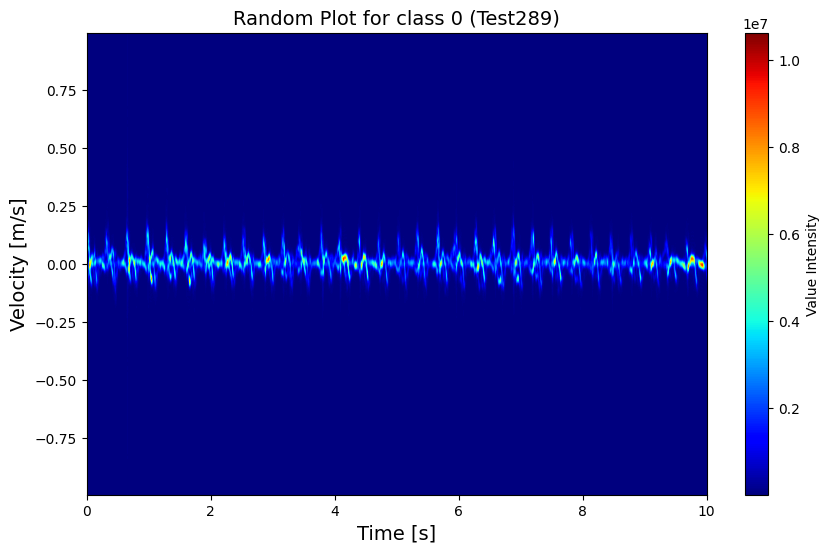

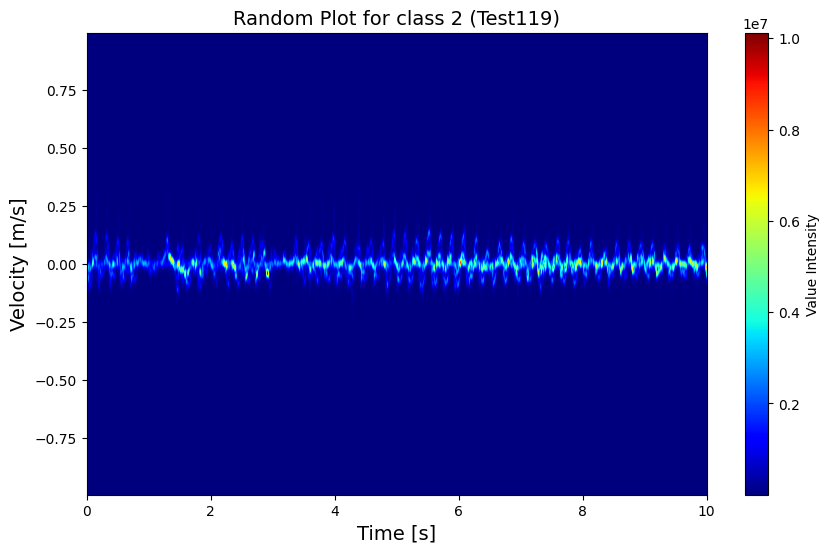

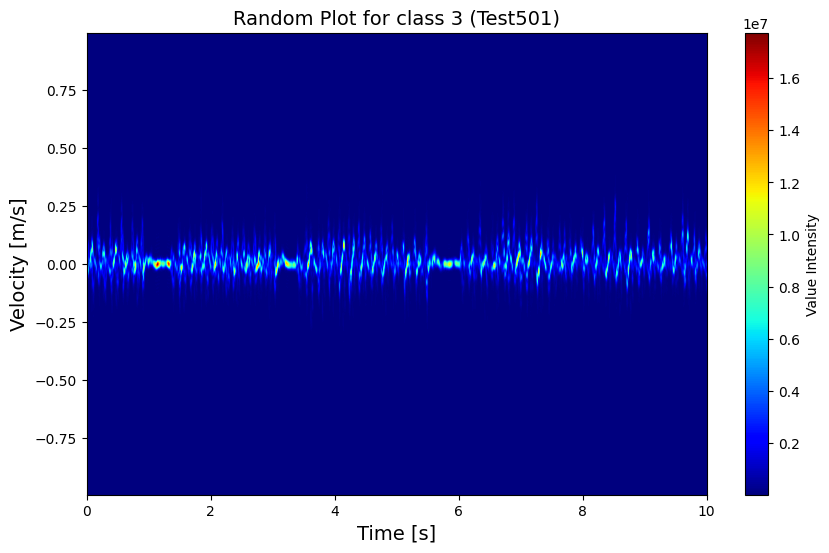

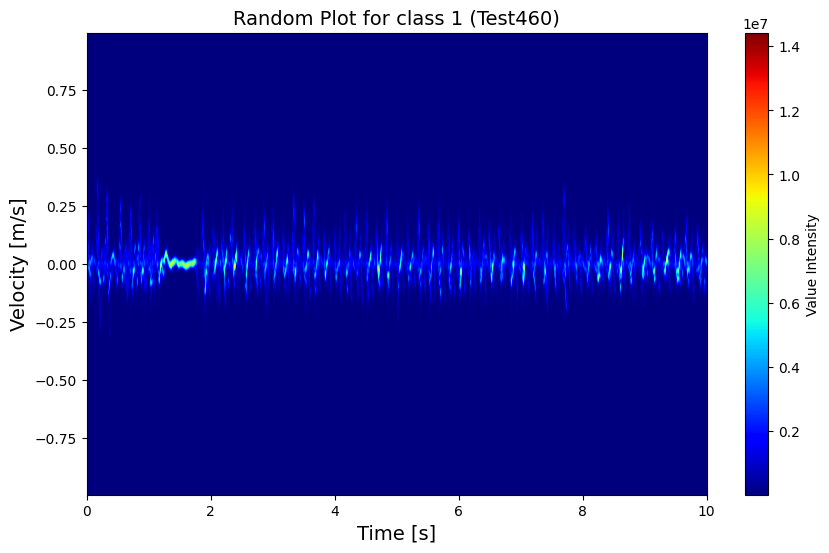

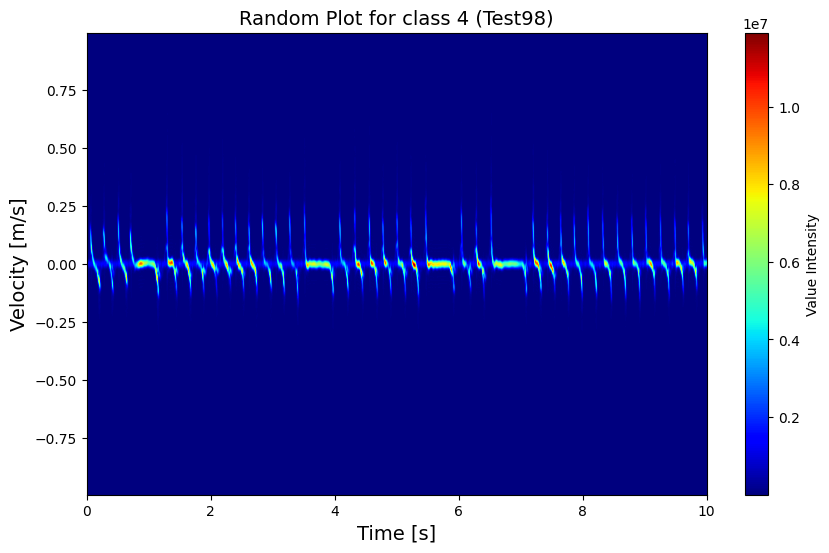

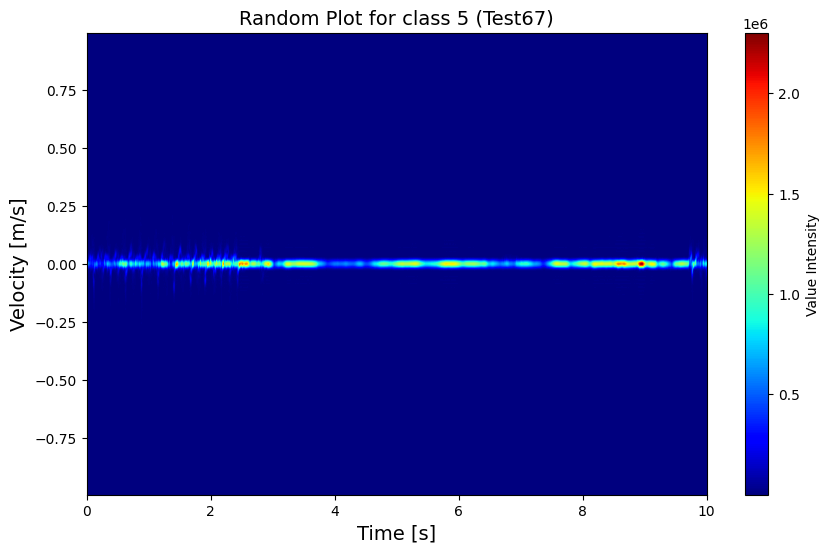

In [20]:
plot_a_matrix_of_each_type(s_obj_list_truncated, file_name, file_values)

new matrix shape is: (1024, 1200)


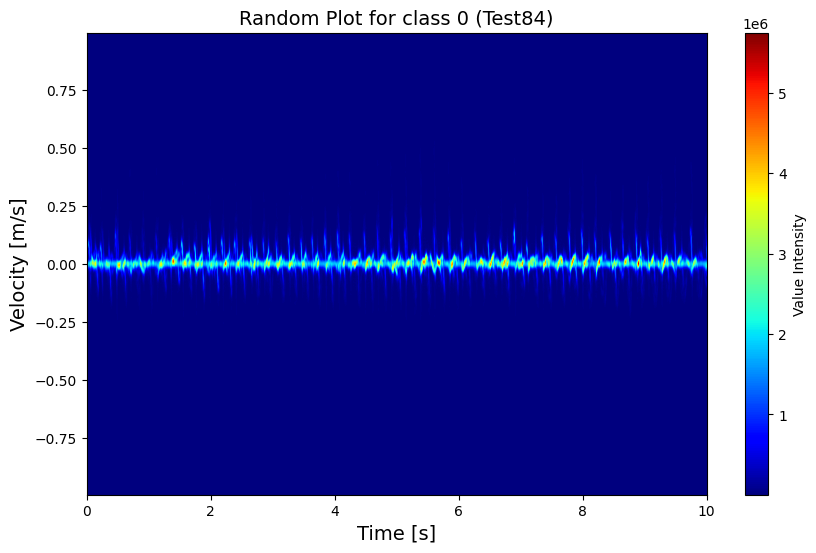

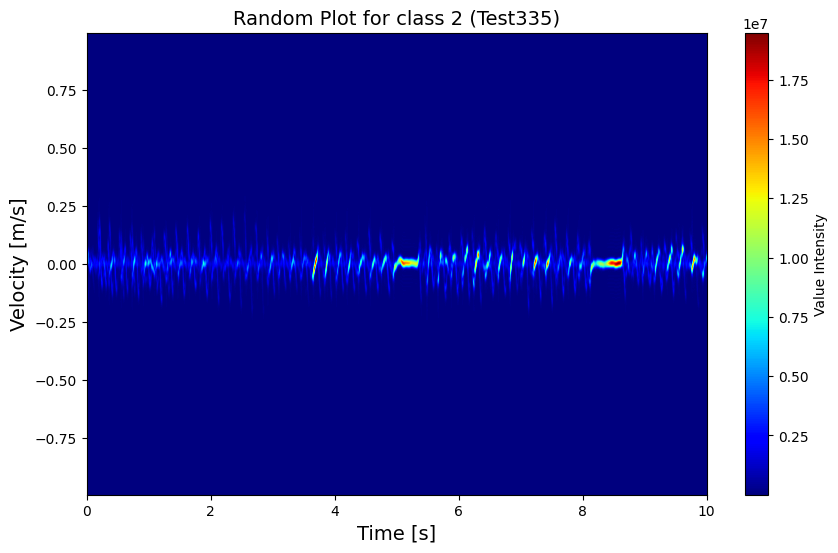

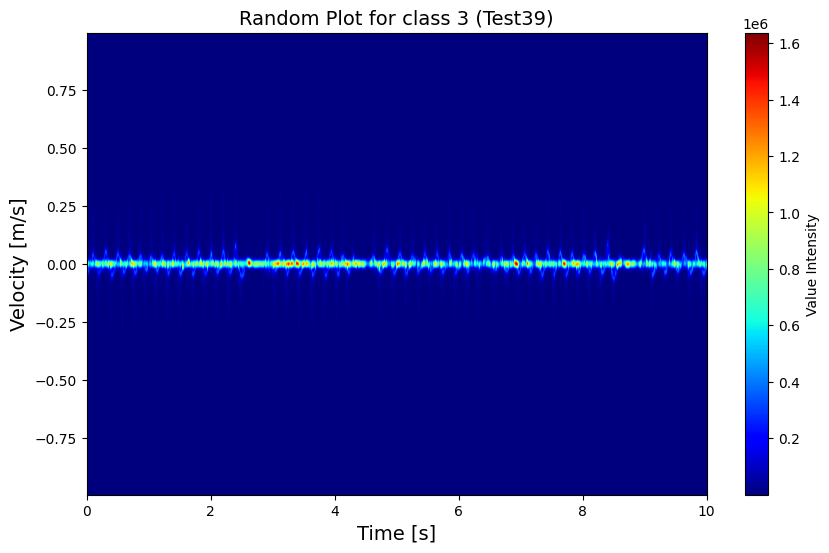

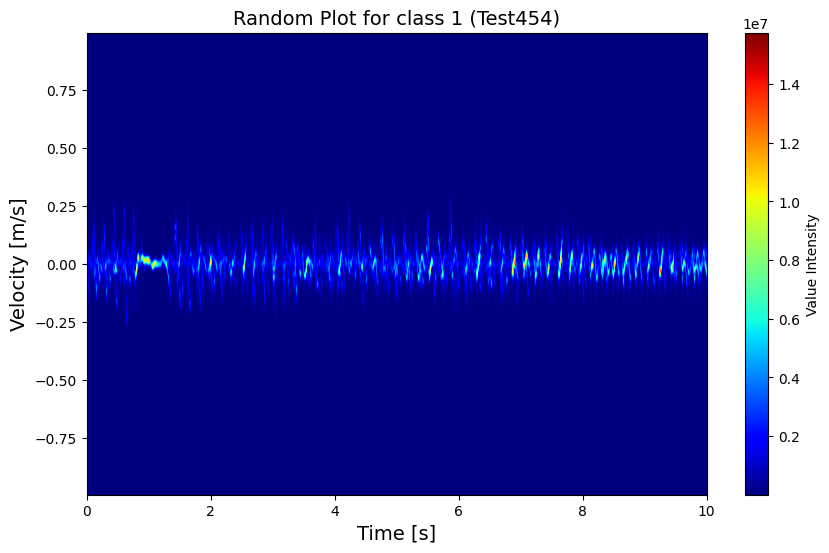

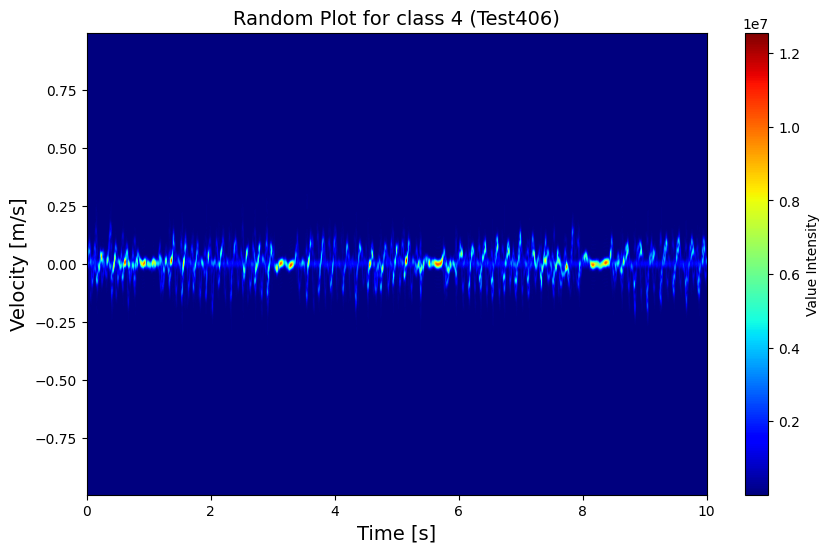

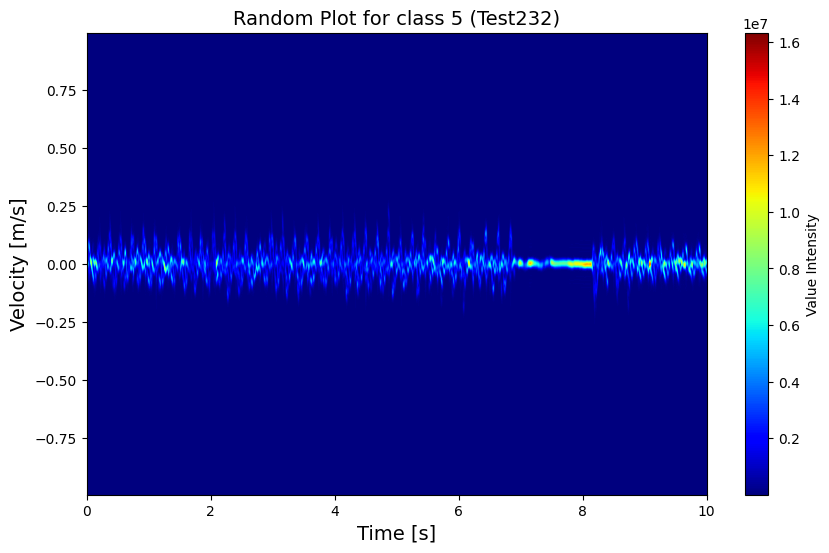

In [21]:
chunk_size = 1
mean_s_obj = mean_matrix_in_chunks(s_obj_list_truncated, chunk_size)
plot_a_matrix_of_each_type(mean_s_obj, file_name, file_values)

In [22]:
#chunk_size = 64
mean_s_obj_physio = mean_matrix_in_chunks(s_obj_list_truncated_physio, chunk_size)

new matrix shape is: (1024, 1200)


# plot data

In [23]:

# sensor settings

# Sensor setting parameters
N_frame=40000 # Number of frames used
N_sample=256 # Number of samples per frame
periodicity = 0.00025 # frame-to-frame interval

S=80*10^12 # Frequency slope [Hz/s]
Fs=6250*10^3 # ADC Sampling rate [sps]
c=299792458 # Speed of light [m/s]

f_start = 77*10^9 # Start frequency of chirp [Hz]
t_window = (N_sample-1)*(1/Fs) # The length of the fast time window
B=S*t_window  # Bandwidth
delta_f = 1/t_window # Frequency interval of sampled signal [Hz]
f_range = np.arange(0, N_sample * delta_f, delta_f) # Frequency axis of the fast time signal
d_range = (f_range*c)/(S*2)    # Distance calculated from frequency [m]
lamda = c/f_start # Wavelength [m]



In [24]:
def plot_velocity_time(s_obj,no_of_plots,test_number,test_label,start_from = 1):
    # Sensor setting parameters
    N_frame=40000 # Number of frames used
    N_sample=256 # Number of samples per frame
    periodicity = 0.00025 # frame-to-frame interval

    S=80*10^12 # Frequency slope [Hz/s]
    Fs=6250*10^3 # ADC Sampling rate [sps]
    c=299792458 # Speed of light [m/s]

    f_start = 77*10^9 # Start frequency of chirp [Hz]
    t_window = (N_sample-1)*(1/Fs) # The length of the fast time window
    B=S*t_window  # Bandwidth
    delta_f = 1/t_window # Frequency interval of sampled signal [Hz]
    f_range = np.arange(0, N_sample * delta_f, delta_f) # Frequency axis of the fast time signal
    d_range = (f_range*c)/(S*2)    # Distance calculated from frequency [m]
    lamda = c/f_start # Wavelength [m]
    start_from-=1 # adjust the test to start from
    #f_doppler = np.linspace(-512, 511, s_obj.shape[0])  # Matching the number of rows

    for pl in range(no_of_plots):
        f_doppler = np.linspace(-512, 511, s_obj[pl+start_from].shape[0])  # Matching the number of rows
        p_spect = periodicity * N_frame / (s_obj[pl+start_from].shape[1] - 1)
        time_peaks = np.arange(0, (s_obj[pl+start_from].shape[1] - 1) * p_spect + p_spect, p_spect)
        uD = -1 * (c * f_doppler / (2 * f_start))

        f_sample = 1 / p_spect

        plt.figure()

        plt.imshow(s_obj[pl+start_from], aspect='auto', extent=[time_peaks[0], time_peaks[-1], uD.min(), uD.max()],cmap='jet')
        plt.xlabel('Time [s]', fontsize=14)
        plt.ylabel('Velocity [m/s]', fontsize=14)
        plt.gca().set_facecolor('white')
        plt.title(f'Plot for {test_number[pl+start_from]} with label {test_label[pl+start_from]}', fontsize=14)

        plt.show()
#plot_velocity_time(s_obj_list_new,10,file_name,file_values)

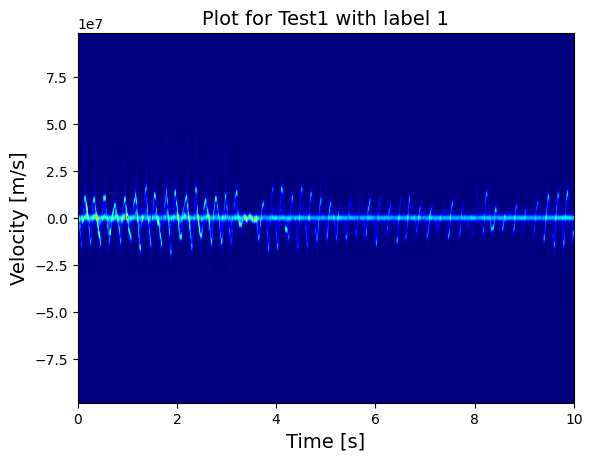

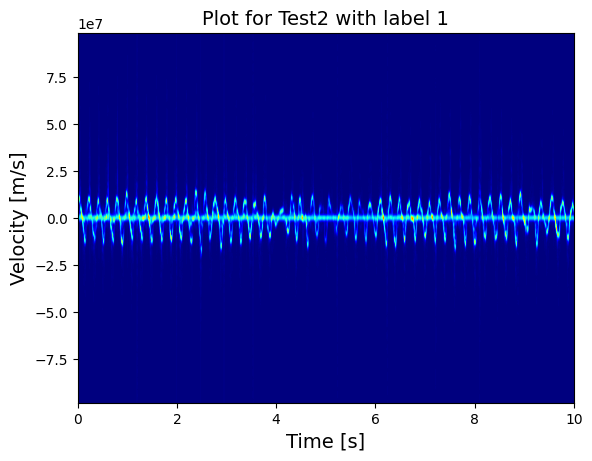

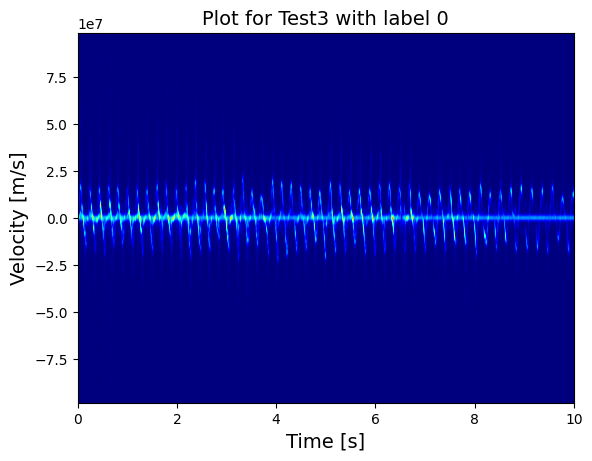

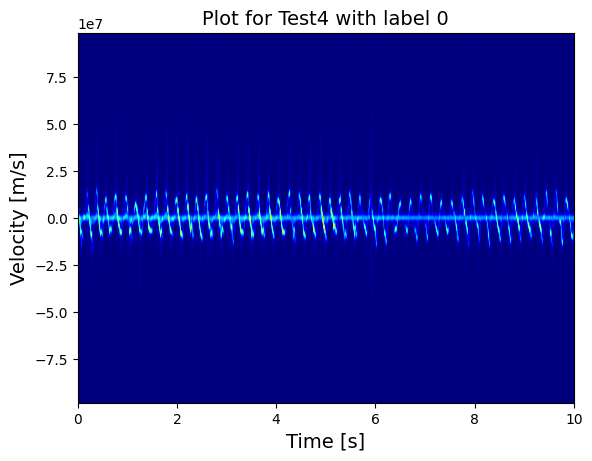

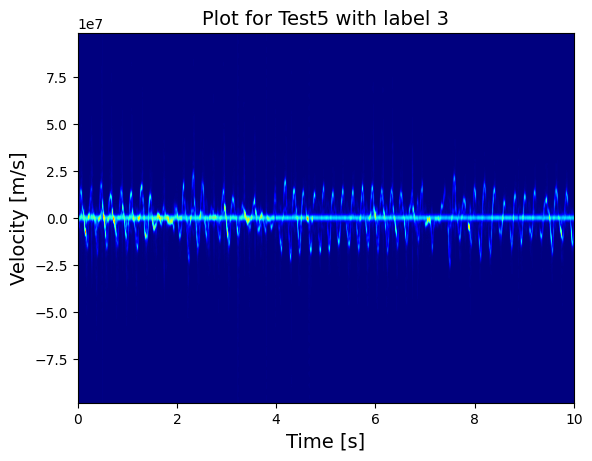

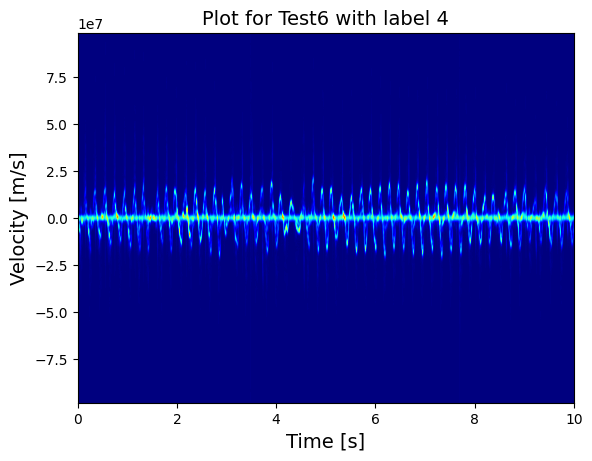

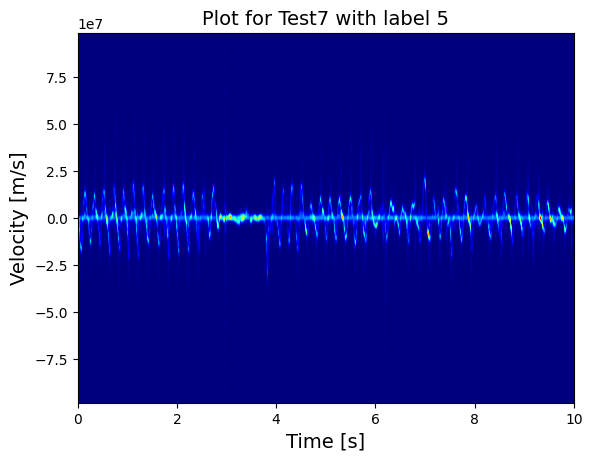

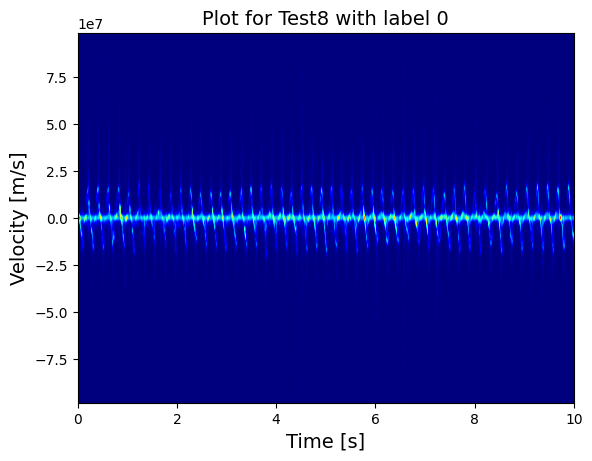

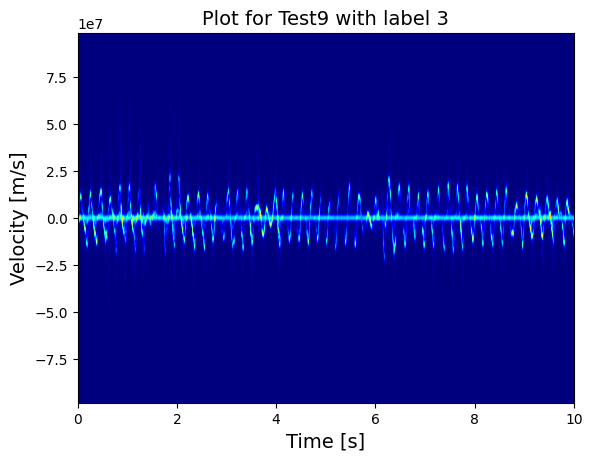

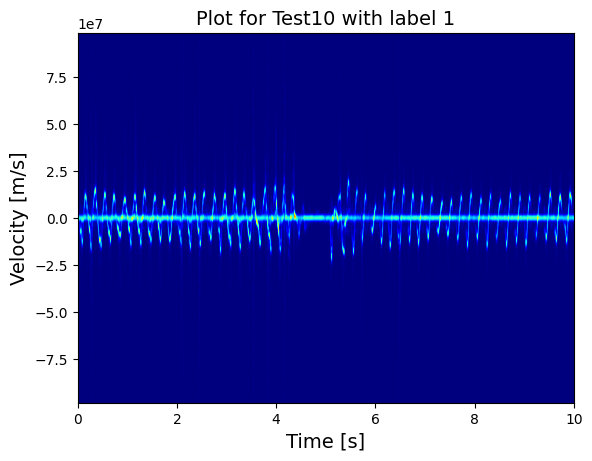

In [25]:
plot_velocity_time(mean_s_obj_physio,10 , file_name_physio, file_values_physio)

In [26]:
def plot_specific_label(s_obj, test_label, test_number, label_to_plot=5, start_from=1, no_of_plots=5):
   

    # Sensor setting parameters
    N_frame=40000 # Number of frames used
    N_sample=256 # Number of samples per frame
    periodicity = 0.00025 # frame-to-frame interval

    S=80*10^12 # Frequency slope [Hz/s]
    Fs=6250*10^3 # ADC Sampling rate [sps]
    c=299792458 # Speed of light [m/s]

    f_start = 77*10^9 # Start frequency of chirp [Hz]
    t_window = (N_sample-1)*(1/Fs) # The length of the fast time window
    B=S*t_window  # Bandwidth
    delta_f = 1/t_window # Frequency interval of sampled signal [Hz]
    f_range = np.arange(0, N_sample * delta_f, delta_f) # Frequency axis of the fast time signal
    d_range = (f_range*c)/(S*2)    # Distance calculated from frequency [m]
    lamda = c/f_start # Wavelength [m]
    start_from-=1 # adjust the test to start from
    # Iterate through the selected number of plots
    for pl in range(no_of_plots):
        current_label = test_label[pl + start_from]

        # Only plot if the label matches the specified label (e.g., 5)
        if current_label == label_to_plot:
            p_spect = periodicity * N_frame / (s_obj[pl + start_from].shape[1] - 1)
            time_peaks = np.arange(0, (s_obj[pl + start_from].shape[1] - 1) * p_spect + p_spect, p_spect)
            uD = -1 * (c * f_doppler / (2 * f_start))  # Doppler velocity conversion

            plt.figure()
            plt.imshow(s_obj[pl + start_from], aspect='auto', extent=[time_peaks[0], time_peaks[-1], uD.min(), uD.max()], cmap='jet')
            plt.xlabel('Time [s]', fontsize=14)
            plt.ylabel('Velocity [m/s]', fontsize=14)
            plt.gca().set_facecolor('white')
            plt.title(f'Plot for {test_number[pl + start_from]} with label {current_label}', fontsize=14)
            plt.colorbar(label='Intensity')
            plt.show()

# Usage example:
#plot_specific_label(mean_s_obj,file_values,file_name, label_to_plot=5, start_from=1, no_of_plots=200)

In [27]:
#plot_specific_label(s_obj_list_new,file_values,file_name, label_to_plot=5, start_from=0, no_of_plots=5)

In [28]:
file_values[15]

0

# data augmentation(flips)

In [29]:
def flip_data(dataset,idx =5):
    s_obj_flipped_ver = []
    s_obj_flipped_hor = []
    s_obj_flipped_both = []
    for i in range(len(dataset)):
      s_obj_flipped_ver.append(np.flipud(dataset[i]))
      s_obj_flipped_hor.append(np.fliplr(dataset[i]))
      s_obj_flipped_both.append(np.flipud(np.fliplr(dataset[i])))

        
    p_spect = periodicity * N_frame / (dataset[idx].shape[1] - 1)
    time_peaks = np.arange(0, (dataset[idx].shape[1] - 1) * p_spect + p_spect, p_spect)

    # Adjust the Doppler velocity range
    f_doppler_reduced = np.linspace(-512, 511, dataset[idx].shape[0])  # Matching the number of rows
    uD = -1 * (c * f_doppler_reduced / (2 * f_start))  # Adjust for the reduced rows



    plt.figure()
    
    plt.imshow(dataset[idx], aspect='auto', extent=[time_peaks[0], time_peaks[-1], uD.min(), uD.max()],cmap='jet')
    plt.xlabel('Time [s]', fontsize=14)
    plt.ylabel('Velocity [m/s]', fontsize=14)
    plt.gca().set_facecolor('white')
    plt.title(f'Plot for {file_name[idx]} with no flips', fontsize=14)


    plt.imshow(s_obj_flipped_ver[idx], aspect='auto', extent=[time_peaks[0], time_peaks[-1], uD.min(), uD.max()],cmap='jet')
    plt.xlabel('Time [s]', fontsize=14)
    plt.ylabel('Velocity [m/s]', fontsize=14)
    plt.gca().set_facecolor('white')
    plt.title(f'Plot for {file_name[idx]} vertically flipped', fontsize=14)
    plt.show()


    plt.imshow(s_obj_flipped_hor[idx], aspect='auto', extent=[time_peaks[0], time_peaks[-1], uD.min(), uD.max()],cmap='jet')
    plt.xlabel('Time [s]', fontsize=14)
    plt.ylabel('Velocity [m/s]', fontsize=14)
    plt.gca().set_facecolor('white')
    plt.title(f'Plot for {file_name[idx]} horizontally flipped', fontsize=14)
    plt.show()


    plt.imshow(s_obj_flipped_both[idx], aspect='auto', extent=[time_peaks[0], time_peaks[-1], uD.min(), uD.max()],cmap='jet')
    plt.xlabel('Time [s]', fontsize=14)
    plt.ylabel('Velocity [m/s]', fontsize=14)
    plt.gca().set_facecolor('white')
    plt.title(f'Plot for {file_name[idx]} flipped both ways', fontsize=14)
    plt.show()


   
    # Show the plot
    plt.show()
    s_obj_list_augmented = dataset + s_obj_flipped_ver + s_obj_flipped_hor + s_obj_flipped_both
    
    return s_obj_list_augmented


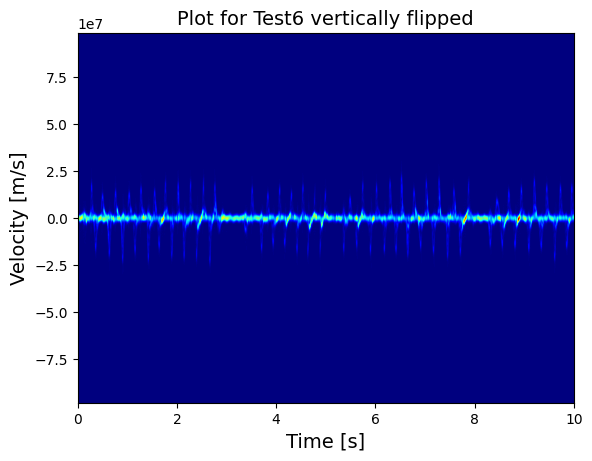

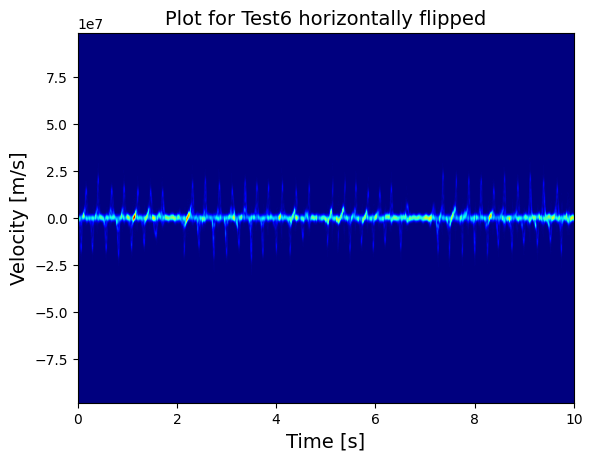

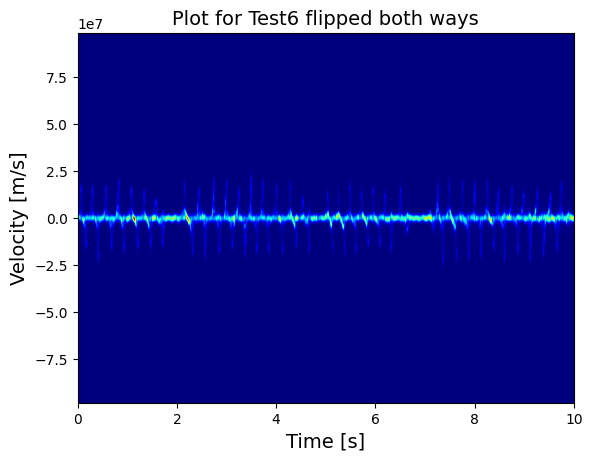

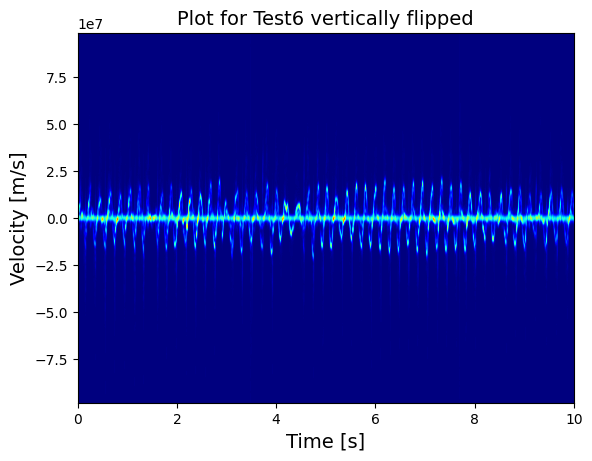

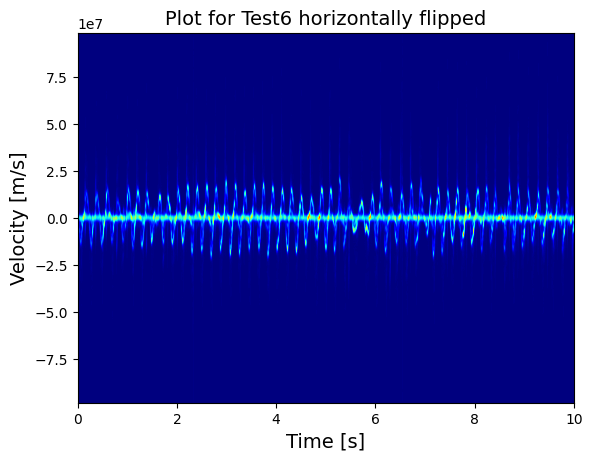

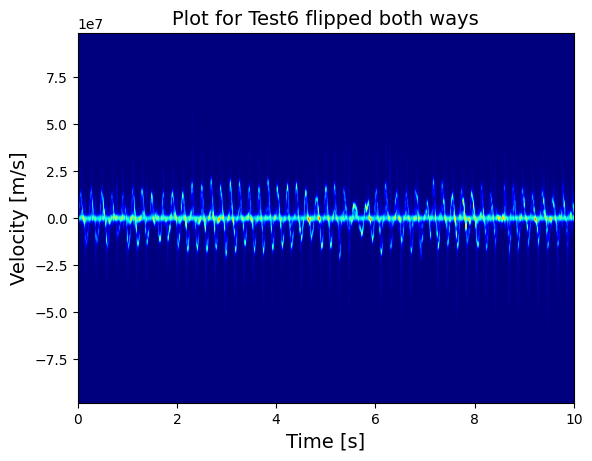

In [30]:
s_obj_list_augmented = flip_data(mean_s_obj)
s_obj_list_augmented_physio = flip_data(mean_s_obj_physio)

# data annotation

In [31]:

def update_keys_values(correct_file_dict):
    keys = list(correct_file_dict.keys())
    values = list(correct_file_dict.values())

    # Define the number of repetitions needed
    num_repeats = 4
    total_keys = num_repeats * len(keys)

    # Create the new dictionary with extended keys
    extended_dict = {}

    for i in range(total_keys):
        original_index = i % len(keys)  # Determine the index for the original key
        new_key = f'Test{i + 1}'  # Create the new key name
        extended_dict[new_key] = values[original_index]  # Map the value

    # Print the length and a sample of the extended dictionary to verify
    print('Number of elements in the extended dictionary:', len(extended_dict))
    #print('Sample entries from the extended dictionary:', list(extended_dict.items()))
    return extended_dict

In [32]:
extended_dict = update_keys_values(correct_file_dict)
no_of_elements = len(extended_dict)
print(f'length of object list after augmentations: {len(s_obj_list_augmented)}')

#assert no_of_elements == len(s_obj_list_augmented)
# Count occurrences of each value
value_counts = Counter(correct_file_dict.values())
new_value_counts = Counter(extended_dict.values())
# Print the counts
# Print the counts in a cleaner format
print("Value counts before augmentations:")
for value, count in sorted(value_counts.items()):
    print(f"Class {value}: {count}")

print("\nValue counts after augmentations:")
for value, count in sorted(new_value_counts.items()):
    print(f"Class {value}: {count}")

Number of elements in the extended dictionary: 2100
length of object list after augmentations: 2100
Value counts before augmentations:
Class 0: 88
Class 1: 86
Class 2: 88
Class 3: 87
Class 4: 87
Class 5: 89

Value counts after augmentations:
Class 0: 352
Class 1: 344
Class 2: 352
Class 3: 348
Class 4: 348
Class 5: 356


In [33]:
#s_obj_list_augmented_physio

In [34]:
extended_dict_physio = update_keys_values(correct_file_dict_physio)
no_of_elements = len(extended_dict_physio)
print(f'length of object list after augmentations: {len(s_obj_list_augmented_physio)}')

#assert no_of_elements == len(s_obj_list_augmented)
# Count occurrences of each value
value_counts_physio = Counter(correct_file_dict_physio.values())
new_value_counts_physio = Counter(extended_dict_physio.values())
# Print the counts
# Print the counts in a cleaner format
print("Value counts before augmentations:")
for value, count in sorted(value_counts_physio.items()):
    print(f"Class {value}: {count}")

print("\nValue counts after augmentations:")
for value, count in sorted(new_value_counts_physio.items()):
    print(f"Class {value}: {count}")

Number of elements in the extended dictionary: 40
length of object list after augmentations: 40
Value counts before augmentations:
Class 0: 3
Class 1: 3
Class 3: 2
Class 4: 1
Class 5: 1

Value counts after augmentations:
Class 0: 12
Class 1: 12
Class 3: 8
Class 4: 4
Class 5: 4


In [35]:
def barplot_per_class(new_value_counts, no_of_elements):
    # Display dataset
    plt.figure(figsize=(12, 6))
    extended_labels = list(new_value_counts.keys())
    extended_counts = list(new_value_counts.values())

    # Plot the bars
    bars = plt.bar(extended_labels, extended_counts, label='Extended')

    # Add count values on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of the bar (the count value)
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Position the count on top of the bar

    # Add labels and title
    plt.xlabel('Class label')
    plt.ylabel('Number of samples')
    plt.title(f'Number of occurrences after data augmentation (Tot.#samples = {no_of_elements})')

    # Show the plot
    plt.show()

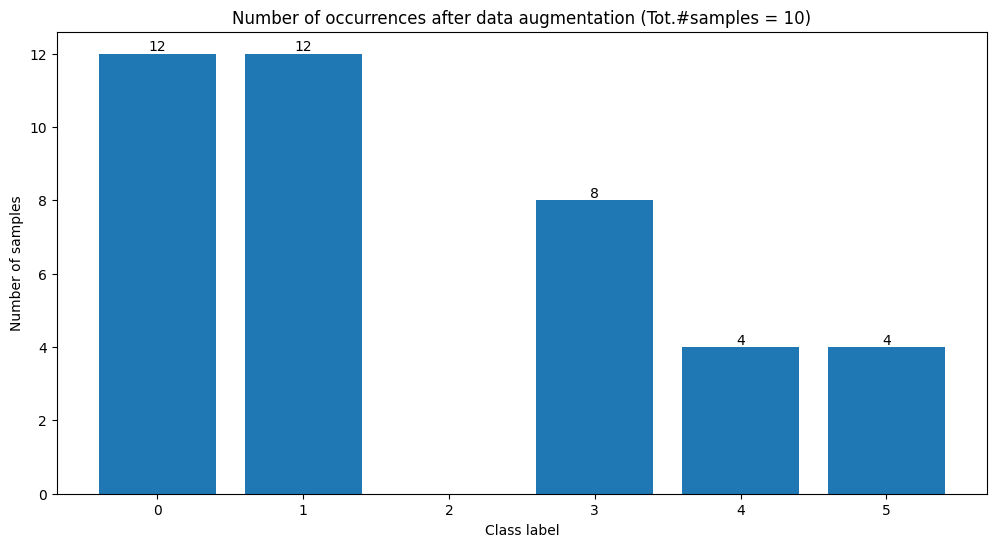

In [36]:
#value_counts_physio = Counter(correct_file_dict_physio.values())

barplot_per_class(new_value_counts_physio,len(correct_file_dict_physio))

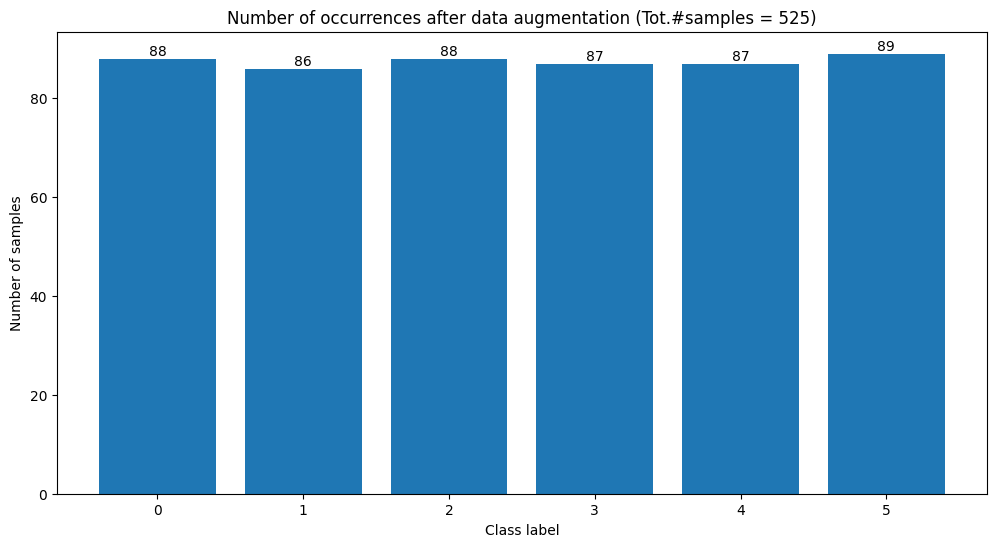

In [37]:
barplot_per_class(value_counts,len(correct_file_dict))

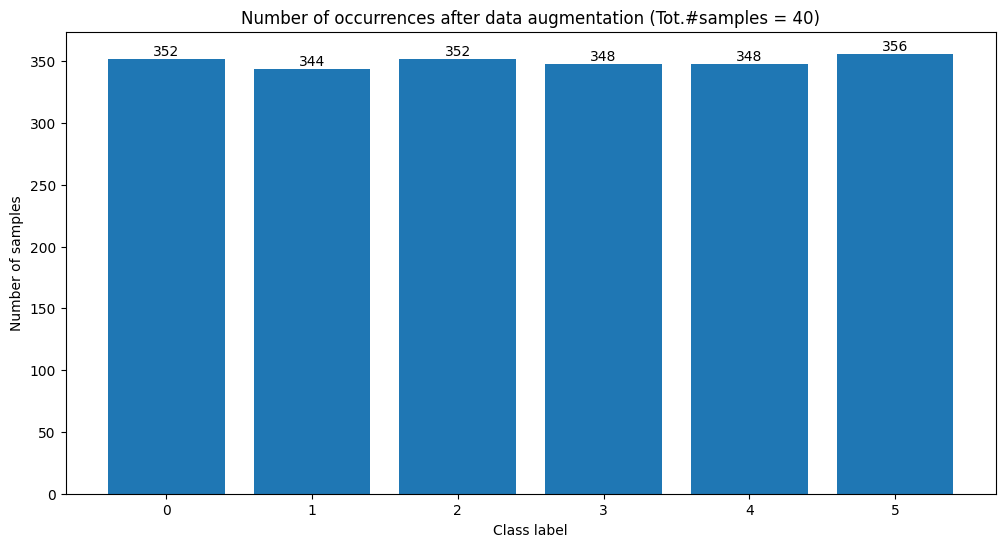

In [38]:
barplot_per_class(new_value_counts,no_of_elements)

# Add labels

In [39]:
def create_data_label_pairs(dataset,data_dict):
    # Create a new list that pairs each matrix with its label
    s_obj_with_labels = []

    for i, matrix in enumerate(dataset):
        # Get the corresponding test key (Test1, Test2, ..., Test100)
        test_key = f'Test{i+1}'

        # Find the label from the extended_dict
        label = data_dict.get(test_key)

        if label is not None:
            # Append a tuple of the matrix and its label
            s_obj_with_labels.append((matrix, label))

    # Verify the length and check a sample
    print(f"Number of matrices with labels: {len(s_obj_with_labels)}")
    print(f"Sample matrix and label: {s_obj_with_labels[0][0].shape}, Label: {s_obj_with_labels[0][1]}")
    return s_obj_with_labels

In [40]:
s_obj_with_labels = create_data_label_pairs(s_obj_list_augmented,extended_dict)

Number of matrices with labels: 2100
Sample matrix and label: (1024, 1200), Label: 0


In [41]:
s_obj_with_labels_physio = create_data_label_pairs(s_obj_list_augmented_physio,extended_dict_physio)

Number of matrices with labels: 40
Sample matrix and label: (1024, 1200), Label: 1


# ML stuff

## train test split and data load

In [ ]:
# Unpacking matrices and labels
matrices = [item[0] for item in s_obj_with_labels]
labels = [item[1] for item in s_obj_with_labels]
matrices_2 = [item[0] for item in s_obj_with_labels_physio[10:]]
labels_2 = [item[1] for item in s_obj_with_labels_physio[10:]]

# Split data: 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(matrices, labels, test_size=0.15, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train set: {len(X_train)}, Val set: {len(X_val)}, Test set: {len(X_test)}")

Train set: 1785, Val set: 157, Test set: 158


In [44]:
X_train[0].shape

(1024, 1200)

In [45]:
matrices_physio = [item[0] for item in s_obj_with_labels_physio[:10]]
labels_physio = [item[1] for item in s_obj_with_labels_physio[:10]]

In [46]:
matrices_physio[0].shape

(1024, 1200)

In [47]:
import torch
import numpy as np
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, matrices, labels, transform=None):
        self.matrices = [torch.tensor(np.ascontiguousarray(matrix), dtype=torch.float32) for matrix in matrices]  # shape [1024, 1147]
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.matrices)

    def __getitem__(self, idx):
        matrix = self.matrices[idx]  # shape should be [1024, 1147]
        label = self.labels[idx]

        # Reshape the matrix to [1, 1147, 1024] for Conv1D input
        matrix = matrix.permute(1, 0)  # Shape: [1147, 1024]
        matrix = matrix.unsqueeze(0)  # Add channel dimension: [1, 1147, 1024]

        if self.transform:
            matrix = self.transform(matrix)

        return matrix, label

# Create datasets
train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset = TimeSeriesDataset(X_val, y_val)
test_dataset = TimeSeriesDataset(X_test, y_test)

# Create data loaders
batch_size = 10

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## model train and test fuctions

In [49]:
from sklearn.metrics import accuracy_score    
from sklearn.metrics import confusion_matrix


def compute_confusion_matrix(model, dataloader,class_names):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.squeeze(2)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # convert lists to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # compute confusion matrix
    conf_mat = confusion_matrix(all_labels, all_preds)

    # plot a heatmat for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return conf_mat


def compute_confusion_matrix_simple(model,y_test,y_preds,class_names):
    
    #y_preds = model.predict(X_test_flattened)
    # compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_preds)
    accuracy = accuracy_score(y_test, y_preds)
    print(f'accuracy on test is: {accuracy}')
    
    # plot a heatmat for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return conf_mat


## model architecture

### simple ML models

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  f1_score, classification_report
from torch.utils.data import DataLoader
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [51]:

def prepare_data(matrices,labels,test_size):
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(matrices, labels, test_size=test_size, random_state=42, stratify=labels)
    #X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    X_train_rf += matrices_2
    y_train_rf += labels_2
    print(f"Train set: {len(X_train_rf)}, Test set: {len(X_test_rf)}")

    train_dataset_rf = TimeSeriesDataset(X_train_rf, y_train_rf)
    #val_dataset = TimeSeriesDataset(X_val, y_val)
    test_dataset_rf = TimeSeriesDataset(X_test_rf, y_test_rf)
    
    
    def flatten_dataloader(dataset):
        data_flattened = []
        labels_flattened = []
        for i in range(len(dataset)):
            matrix, label = dataset[i]
            matrix = matrix.squeeze(0)  # Remove the first dimension [1, 1247, 64] -> [1247, 64]
            matrix_flattened = matrix.flatten().numpy()  # Flatten to 1D and convert to NumPy array
            data_flattened.append(matrix_flattened)
            labels_flattened.append(label.item())
        return np.array(data_flattened), np.array(labels_flattened)

    # Flatten training and validation datasets
    X_train_flattened, y_train_flattened = flatten_dataloader(train_dataset_rf)
    #X_val_flattened, y_val_flattened = flatten_dataloader(val_dataset)
    X_test_flattened, y_test_flattened = flatten_dataloader(test_dataset_rf)
    
    return  X_train_flattened, y_train_flattened, X_test_flattened, y_test_flattened

def train_predict_simple_model(model,X_train_flattened, y_train_flattened, X_test_flattened, y_test_flattened):
    

    # Train the Random Forest classifier on the flattened data
    model.fit(X_train_flattened, y_train_flattened)

    # Predict on the validation set
    y_pred = model.predict(X_test_flattened)

    # Compute accuracy
    accuracy = accuracy_score(y_test_flattened, y_pred)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    print(classification_report(y_test_flattened, y_pred))
    class_names = ['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5']

    compute_confusion_matrix_simple(model,y_test_flattened,y_pred,class_names)

In [ ]:
%%time
test_size = 0.10
# run this code whe chunk size is different than 1 to reduce the dimentions of the columns (go to 'mean_matrix_in_chunks' definition)

if chunk_size != 1: 

    X_train_flattened, y_train_flattened, X_test_flattened, y_test_flattened = prepare_data(matrices,labels,test_size = test_size) # test_size = 0.1
    
    #Initialize RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators = 1500,
                                         #min_samples_split =5,
                                         #min_samples_leaf = 2,
                                         max_features ='log2',
                                         #max_depth = 90,
                                         bootstrap = False,
                                         verbose = 1,
                                         random_state=42,
                                         n_jobs= -1)

    #model1 = GradientBoostingClassifier(n_estimators=10, random_state=42,verbose = 1)
    #model2 = XGBClassifier(n_estimators=200, random_state=42, n_jobs = -1)
    # model3 = SVC(kernel='poly', 
    #              probability=True,
    #              random_state=42,)

    train_predict_simple_model(rf_classifier, *prepare_data(matrices, labels, test_size=test_size))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


In [56]:
def prepare_physio_data(matrices,labels):
    print(f"Physio set: {len(matrices)}")

    #train_dataset_rf = TimeSeriesDataset(X_train_rf, y_train_rf)
    #val_dataset = TimeSeriesDataset(X_val, y_val)
    physio_dataset = TimeSeriesDataset(matrices, labels)
    
    def flatten_dataloader(dataset):
        data_flattened = []
        labels_flattened = []
        for i in range(len(dataset)):
            matrix, label = dataset[i]
            matrix = matrix.squeeze(0)  # Remove the first dimension [1, 1247, 64] -> [1247, 64]
            matrix_flattened = matrix.flatten().numpy()  # Flatten to 1D and convert to NumPy array
            data_flattened.append(matrix_flattened)
            labels_flattened.append(label.item())
        return np.array(data_flattened), np.array(labels_flattened)

    
    matrices_physio, labels_physio = flatten_dataloader(physio_dataset)
    
    return  matrices_physio, labels_physio

def predict_physio_data(model,X_train_flattened, y_train_flattened, matrices_physio, labels_physio):
    

    # Train the Random Forest classifier on the flattened data
    model.fit(X_train_flattened, y_train_flattened)

    # Predict on the validation set
    y_pred = model.predict(matrices_physio)

    # Compute accuracy
    accuracy = accuracy_score(labels_physio, y_pred)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    print(classification_report(labels_physio, y_pred))
    class_names = ['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5']

    compute_confusion_matrix_simple(model,labels_physio,y_pred,class_names)

In [58]:
%%time
if chunk_size != 1:
    matrices_physio_ready, labels_physio_ready = prepare_physio_data(matrices_physio,labels_physio)

    # Initialize RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators = 1000,
                                         #min_samples_split =5,
                                         #min_samples_leaf = 2,
                                         max_features ='log2',
                                         #max_depth = 10,
                                         #bootstrap = False,
                                         verbose = 1,
                                         random_state=420,
                                         n_jobs= -1)

    #model1 = GradientBoostingClassifier(n_estimators=10, random_state=42,verbose = 1)
    #model2 = XGBClassifier(n_estimators=200, random_state=42, n_jobs = -1)
    # model3 = SVC(kernel='poly', 
    #              probability=True,
    #              random_state=42,)


    predict_physio_data(rf_classifier,X_train_flattened, y_train_flattened, matrices_physio_ready, labels_physio_ready)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


In [59]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# def plot_single_tree(model, feature_names, tree_index=0, max_depth=None):
#     """
#     Plots a single decision tree from a RandomForestClassifier model using Matplotlib.

#     Parameters:
#     model : trained RandomForestClassifier
#     feature_names : list of feature names
#     tree_index : index of the tree to visualize (default: 0)
#     max_depth : limit the depth of the tree shown (default: None)
#     """
#     # Extract a single tree
#     tree = model.estimators_[tree_index]
    
#     # Plot the tree using Matplotlib
#     plt.figure(figsize=(20, 10))
#     plot_tree(tree, feature_names=feature_names, filled=True, rounded=True, max_depth=max_depth)
#     plt.show()

# # Example usage
# plot_single_tree(rf_classifier, feature_names, tree_index=0, max_depth=3)  # Plot only up to depth 3

In [60]:
# from sklearn.tree import export_graphviz
# import matplotlib.pyplot as plt
# import graphviz
# from IPython.display import FileLink

# def visualize_random_forest_tree(model, feature_names, tree_index=0):
#     """
#     Visualizes a single decision tree from a RandomForestClassifier model.

#     Parameters:
#     model : trained RandomForestClassifier
#     feature_names : list of feature names
#     tree_index : index of the tree to visualize (default: 0)
#     """
#     # Extract a single tree
#     tree = model.estimators_[tree_index]
    
#     # Export the tree to DOT format
#     dot_data = export_graphviz(tree, out_file=None, 
#                                feature_names=feature_names,  
#                                filled=True, rounded=True,  
#                                special_characters=True,max_depth = 4)
    
#     # Use Graphviz to create a visualization
#     graph = graphviz.Source(dot_data)
#     graph.render("decision_tree")  # Save the visualization to a file
#     return graph

# # Example usage
# # rf_model.fit(X_train, y_train)  # Make sure the model is trained
# #feature_names = ['0 interruptions', '1 interruption', '2 interruptions','3 interruptions','4 interruptions','freezing']

# # Generate placeholder feature names if you don't have actual feature names
# n_features = X_train_flattened.shape[1]  # Make sure this matches the number of features in your data
# feature_names = [f'feature_{i}' for i in range(n_features)]

# graph = visualize_random_forest_tree(rf_classifier, feature_names)
# #graph.view()  # Display the graph
# FileLink('decision_tree.pdf')

In [61]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score

# def plot_accuracy_vs_estimators(model, X_train, y_train, X_test, y_test, estimator_range):
#     """
#     Plots the accuracy of a model as the number of estimators grows.

#     Parameters:
#     model : the classifier object (must have the 'n_estimators' parameter)
#     X_train : training features
#     y_train : training labels
#     X_test : test features
#     y_test : test labels
#     estimator_range : list or range of n_estimators values to test
#     """
#     train_accuracies = []
#     test_accuracies = []

#     for n in estimator_range:
#         # Update the model's n_estimators parameter
#         model.set_params(n_estimators=n)
#         # Train the model
#         model.fit(X_train, y_train)
        
#         # Make predictions on training and test data
#         y_train_pred = model.predict(X_train)
#         y_test_pred = model.predict(X_test)
        
#         # Calculate accuracy for both training and test sets
#         train_accuracy = accuracy_score(y_train, y_train_pred)
#         test_accuracy = accuracy_score(y_test, y_test_pred)
        
#         train_accuracies.append(train_accuracy)
#         test_accuracies.append(test_accuracy)
        
#         print(f'param1: {n}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')
    
#     # Plot the results
#     plt.figure(figsize=(10, 6))
#     #plt.plot(estimator_range, train_accuracies, label='Train Accuracy', marker='o')
#     plt.plot(estimator_range, test_accuracies, label='Test Accuracy', marker='o')
#     plt.xlabel('Number of Estimators')
#     plt.ylabel('Accuracy')
#     plt.title('Accuracy vs Number of Estimators')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# # Instantiate the model
# rf_model = RandomForestClassifier(random_state=42, max_features ='log2',bootstrap = True, n_jobs = -1) #max_features ='log2'

# # Define a range for the number of estimators
# range_1 = range(1200, 2000, 100)

# # Use the function to plot accuracy as n_estimators grows
# plot_accuracy_vs_estimators(rf_model, X_train_flattened, y_train_flattened, matrices_physio_ready, labels_physio_ready, range_1)


In [62]:



# model1 = RandomForestClassifier(n_estimators=200, random_state=42)
# model2 = LogisticRegression(random_state=42)
# model3 = SVC(kernel='linear', probability=True, random_state=42)
# ensemble_model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('svc', model3)], voting='soft')
# ensemble_model.fit(X_train_flattened, y_train_flattened)
# y_pred = ensemble_model.predict(X_test_flattened)

# accuracy = accuracy_score(y_test_flattened, y_pred)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')

# print(classification_report(y_test_flattened, y_pred))

In [63]:
# from sklearn.model_selection import RandomizedSearchCV
# import pprint

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['log2', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(20, 100, num = 9)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 7]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                #'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint.pp(random_grid)

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_flattened, y_train_flattened)



In [66]:
#print("Best parameters found: ", rf_random.best_params_)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import pprint

# TAKES A LOT OF TIME TO RUN

# # Define the parameter grid for the XGBClassifier
# param_grid = {
#     'n_estimators': [int(x) for x in np.linspace(start=50, stop=300, num=6)],  # Number of boosting rounds
#     'max_depth': [int(x) for x in np.linspace(3, 15, num=5)],  # Maximum depth of a tree
#     'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Learning rate (eta)
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
#     'min_child_weight': [1, 3, 5, 7],  # Minimum sum of instance weight (hessian) needed in a child
#     'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
#     'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization term on weights
#     'reg_lambda': [0.01, 0.1, 1, 10],  # L2 regularization term on weights
#     #'scale_pos_weight': [1, 2, 5],  # Balancing the positive class (useful for imbalanced data)
# }

# # Pretty print the parameter grid
# pprint.pprint(param_grid)

# xgb_model = XGBClassifier(
#     random_state=42, 
#     n_jobs=-1, 
#     tree_method='hist', 
#     device = 'cuda',
#     #predictor='gpu_predictor'  # Use GPU for predictions as well
# )

# # Fit the random search model
# xgb_random_search = RandomizedSearchCV(estimator=xgb_model, 
#                                        param_distributions=param_grid, 
#                                        n_iter=100, 
#                                        cv=3, 
#                                        verbose=2, 
#                                        random_state=42, 
#                                        n_jobs=-1)

# xgb_random_search.fit(X_train_flattened, y_train_flattened)  # No need for DMatrix

# # Print the best parameters found
# print("Best parameters found: ", xgb_random_search.best_params_)

In [68]:
#print("Best parameters found: ", xgb_random_search.best_params_)

### Deep Models

In [ ]:
#import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import seaborn as sns

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, matrices, labels, transform=None):
        self.matrices = matrices  
        self.labels = labels  
        self.transform = transform

    def __len__(self):
        return len(self.matrices)

    def __getitem__(self, idx):
        # Load each matrix lazily
        matrix = np.ascontiguousarray(self.matrices[idx]).astype(np.float32)  # Load and cast data lazily
        label = self.labels[idx]

        # Convert to torch tensor only when retrieving
        matrix = torch.tensor(matrix, dtype=torch.float32)  # Shape: [1024, 1200]
        label = torch.tensor(label, dtype=torch.long)

        # Apply any transform if needed
        if self.transform:
            matrix = self.transform(matrix)

        return matrix, label


# Create datasets

# Split data: 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(matrices, labels, test_size=0.15, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

print(f"Train set: {len(X_train)}, Val set: {len(X_val)}, Test set: {len(X_test)}")

train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset = TimeSeriesDataset(X_val, y_val)
test_dataset = TimeSeriesDataset(X_test, y_test)


# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



Train set: 1785, Val set: 157, Test set: 158


In [71]:
physio_dataset = TimeSeriesDataset(matrices_physio, labels_physio)
physio_loader = DataLoader(physio_dataset,batch_size=1, shuffle=False)

In [88]:
len(train_loader)

112

In [74]:
# Cell 2: Prepare Data
# Unpacking matrices and labels
#matrices = [item[0] for item in s_obj_with_labels]
#labels = [item[1] for item in s_obj_with_labels]




print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)
# # Reshape data for 1D CNN
# Reshape data to fit 1D CNN (1 channel)
# X_train_reshaped = np.array(X_train, dtype=np.float32).reshape(X_train[0].shape, 1024, 1200)
# X_val_reshaped = np.array(X_val, dtype=np.float32).reshape(X_val[0].shape, 1024, 1200)
# X_test_reshaped = np.array(X_test, dtype=np.float32).reshape(X_test[0].shape, 1024, 1200)

# # Check the shapes after reshaping
# print(f"Reshaped X_train: {X_train_reshaped.shape}")  # Should be (n_samples, 1, 1024, 1200)
# print(f"Reshaped X_val: {X_val_reshaped.shape}")      # Should be (n_samples, 1, 1024, 1200)
# print(f"Reshaped X_test: {X_test_reshaped.shape}")    # Should be (n_samples, 1, 1024, 1200)

# # Convert to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_reshaped, dtype=torch.float32)
# X_val_tensor = torch.tensor(X_val_reshaped, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test_reshaped, dtype=torch.float32)

# # Convert labels to PyTorch tensors
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)
# y_val_tensor = torch.tensor(y_val, dtype=torch.long)
# y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# # Check tensor shapes
# print(f"X_train_tensor shape: {X_train_tensor.shape}")  # Should be [n_samples, 1, 1024, 1200]
# print(f"y_train_tensor shape: {y_train_tensor.shape}")  # Should be [n_samples]




(1024, 1200)
(1024, 1200)
(1024, 1200)


In [ ]:
def output_to_label(z):
    """Map network output z to hard labels {0, 1, 2, 3, 4, 5}

    Args:
        z (Tensor): Probabilities for each class in a batch, expected shape [batch_size, num_classes].
    Returns:
        c (Tensor): Hard labels {0, 1, 2, 3, 4, 5} for each sample in a batch.
    """
    # Get the index of the maximum probability for each sample
    c = torch.argmax(z, dim=1)  # argmax along the class dimension
    return c


def training_loop(
    model, optimizer, loss_fn, train_loader, val_loader, num_epochs,print_every=5
):
    print("Starting training")
    device = torch.device('cuda')
    model.to(device)
    train_losses, train_accs, val_losses, val_accs = [], [], [], []

    for epoch in range(1, num_epochs + 1):
        model, train_loss, train_acc = train_epoch(
            model, optimizer, loss_fn, train_loader, val_loader, device, print_every
        )
        val_loss, val_acc = validate(model, loss_fn, val_loader, device)
        
        # Store epoch results
        train_losses.append(sum(train_loss) / len(train_loss))
        train_accs.append(sum(train_acc) / len(train_acc))
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(
            f"Epoch {epoch}/{num_epochs}: "
            f"Train loss: {train_losses[-1]:.3f}, "
            f"Train acc.: {train_accs[-1]:.3f}, "
            f"Val. loss: {val_loss:.3f}, "
            f"Val. acc.: {val_acc:.3f}"
        )
    # Plotting results
    plot_results(train_losses, train_accs, val_losses, val_accs)

    return model

def train_epoch(
    model, optimizer, loss_fn, train_loader, val_loader, device, print_every
):
    # Train:
    model.train()
    train_loss_batches, train_acc_batches = [], []
    num_batches = len(train_loader)
    
    for batch_index, (x, y) in enumerate(train_loader, 1):
        inputs, labels = x.to(device), y.to(device)
        optimizer.zero_grad()
        z = model.forward(inputs)
        loss = loss_fn(z, labels)
        loss.backward()
        optimizer.step()
        train_loss_batches.append(loss.item())

        hard_preds = output_to_label(z)
        acc_batch_avg = (hard_preds == labels).float().mean().item()
        train_acc_batches.append(acc_batch_avg)

    return model, train_loss_batches, train_acc_batches

def validate(model, loss_fn, val_loader, device):
    val_loss_cum = 0
    val_acc_cum = 0
    model.eval()
    with torch.no_grad():
        for batch_index, (x, y) in enumerate(val_loader, 1):
            inputs, labels = x.to(device), y.to(device)
            z = model.forward(inputs)

            batch_loss = loss_fn(z, labels)
            val_loss_cum += batch_loss.item()
            hard_preds = output_to_label(z)
            acc_batch_avg = (hard_preds == labels).float().mean().item()
            val_acc_cum += acc_batch_avg
    return val_loss_cum / len(val_loader), val_acc_cum / len(val_loader)

def plot_results(train_losses, train_accs, val_losses, val_accs):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 6))

    # Plot training and validation losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.title('Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Train Accuracy')
    plt.plot(epochs, val_accs, label='Validation Accuracy')
    plt.title('Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
class CONV1D_3(nn.Module):
    def __init__(self):
        super(CONV1D_3, self).__init__()
        
        # First convolutional layer
        self.conv1 = nn.Conv1d(in_channels=1024, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        
        # Second convolutional layer
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        
        # Third convolutional layer
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        
        # Pooling and dropout layers
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 150, 256)  # Updated to 9600 (64 * 150)
        self.fc2 = nn.Linear(256, 6)  # 6 classes
    
    def forward(self, x):
        # First convolution block
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.dropout(x)
        
        # Second convolution block
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout(x)
        
        # Third convolution block
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout(x)
        
        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [ ]:
new_model = CONV1D_3()
loss_fn = nn.CrossEntropyLoss()  # Include class weights
optimizer = optim.Adam(new_model.parameters(), lr=0.001)

In [ ]:
num_epochs = 100
model, train_losses, train_accs, val_losses, val_accs = training_loop(
    new_model, optimizer, loss_fn, train_loader, val_loader, num_epochs, print_every = 5)

In [ ]:
def test_with_confusion_matrix_and_accuracy(model, test_loader, device, class_names):
    all_preds = []
    all_labels = []
    false_images = []
    false_labels = []
    false_preds = []

    model.eval()
    
    with torch.no_grad():  # No need to calculate gradients during inference
        for batch_index, (x, y) in enumerate(test_loader, 1):
            inputs, labels = x.to(device), y.to(device)
            z = model.forward(inputs)
            
            hard_preds = output_to_label(z)  # Convert output to predicted labels
            all_preds.extend(hard_preds.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())     # Store true labels
            
            # Collect false predictions
            for i in range(len(hard_preds)):
                if hard_preds[i] != labels[i].item():
                    false_images.append(inputs[i].cpu())  # Store the image
                    false_labels.append(labels[i].item())  # Store the true label
                    false_preds.append(hard_preds[i])      # Store the predicted label

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    
    # Print accuracy
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Accuracy: {accuracy * 100:.2f}%)')
    plt.show()

    # Plot false predictions
    #if false_images:
        #plot_false_predictions(false_images, false_labels, false_preds, class_names)

    return cm, accuracy

def plot_false_predictions(false_images, false_labels, false_preds, class_names):
    # Set up the plot
    num_images = len(false_images)
    cols = 4  # Number of columns for the grid
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate the number of rows

    plt.figure(figsize=(15, 4 * rows))  # Adjust size as needed
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        
        # Ensure the image is in the correct shape for imshow
        img = false_images[i].permute(1, 2, 0) if false_images[i].dim() == 3 else false_images[i].unsqueeze(0).permute(1, 2, 0)
        
        # Normalize image to range [0, 1] if it's not already
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
        
        plt.imshow(img)  # Display the image
        plt.title(f'True: {class_names[false_labels[i]]}\nPred: {class_names[false_preds[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
class_names = ['Normal', 'One Interruption', 'Two Interruptions', 'Three Interruptions', 'Four Interruptions', 'Freezing']  # Replace with your actual class names

cm, accuracy = test_with_confusion_matrix_and_accuracy(new_model, physio_loader, device='cuda', class_names=class_names)